In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

D:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
train_data.shape

(404, 13)

In [3]:
 test_data.shape

(102, 13)

In [4]:
train_targets[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean #mean of training data
test_data /= std  #std of training data

In [6]:
from keras import models
from keras import layers

In [7]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) #For regression, last layer has no activation function
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [8]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [9]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [10]:
all_scores

[2.0633490085601807,
 2.7549374103546143,
 2.7553255558013916,
 2.5086333751678467]

In [11]:
import numpy as np

In [12]:
np.mean(all_scores)

2.5205613374710083

In [27]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [22]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

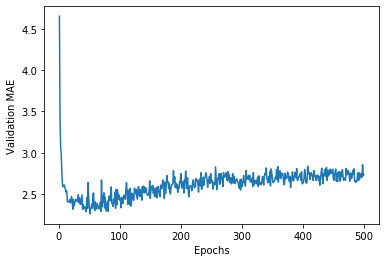

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [62]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

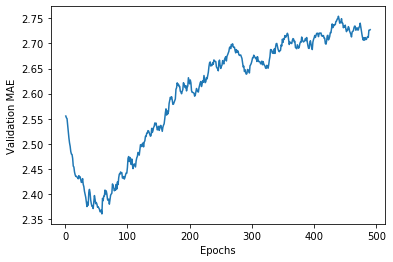

In [63]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
#Let's understand overfitting with various network sizes

In [28]:
from keras.datasets import imdb
#train, test = imdb.load_data(num_words=10000)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #unpacking

In [29]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [30]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #25000 X 10000
    #sequences (0 - 25000)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  #[0, [180,19999,89000]] = 1
    return results

In [31]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [32]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [33]:
#Smaller network
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [36]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [37]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 95ms/step - loss: 0.6095 - accuracy: 0.6675 - val_loss: 0.5650 - val_accuracy: 0.7053
Epoch 2/20
30/30 [==============================] - 2s 63ms/step - loss: 0.5167 - accuracy: 0.8044 - val_loss: 0.5202 - val_accuracy: 0.8446
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.4719 - accuracy: 0.8618 - val_loss: 0.4934 - val_accuracy: 0.8355
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4403 - accuracy: 0.8915 - val_loss: 0.4812 - val_accuracy: 0.8353
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4149 - accuracy: 0.9121 - val_loss: 0.4778 - val_accuracy: 0.8326
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3934 - accuracy: 0.9282 - val_loss: 0.4559 - val_accuracy: 0.8717
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3758 - accuracy: 0.9397 - val_loss: 0.4680 - val_accuracy: 0.8473
Epoch 8/20
30

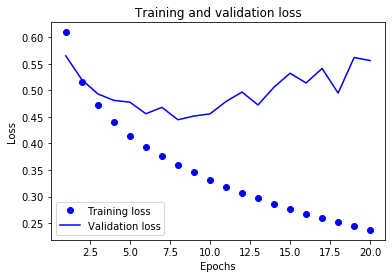

In [38]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
#Larger network
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 16s 505ms/step - loss: 0.5525 - accuracy: 0.7627 - val_loss: 0.3527 - val_accuracy: 0.8478
Epoch 2/20
30/30 [==============================] - 13s 433ms/step - loss: 0.2532 - accuracy: 0.9022 - val_loss: 0.3721 - val_accuracy: 0.8444
Epoch 3/20
30/30 [==============================] - 13s 430ms/step - loss: 0.1452 - accuracy: 0.9443 - val_loss: 0.3333 - val_accuracy: 0.8774
Epoch 4/20
30/30 [==============================] - 15s 499ms/step - loss: 0.0797 - accuracy: 0.9715 - val_loss: 0.3389 - val_accuracy: 0.8731
Epoch 5/20
30/30 [==============================] - 14s 476ms/step - loss: 0.0687 - accuracy: 0.9792 - val_loss: 0.3355 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 14s 454ms/step - loss: 0.0038 - accuracy: 0.9997 - val_loss: 0.4985 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 13s 440ms/step - loss: 4.5650e-04 - accuracy: 1.0000 - val_loss: 0.6854 - val_accuracy: 0.

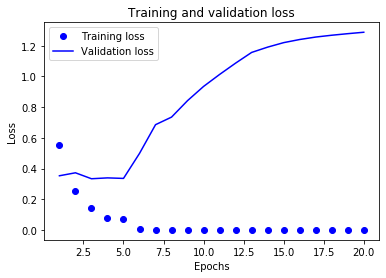

In [43]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
#Assignment: Try a datase and train it for different network sizes. Analyze for underfitting, overfitting

In [45]:
#Regularization

In [58]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [59]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 84ms/step - loss: 0.5806 - accuracy: 0.7907 - val_loss: 0.4681 - val_accuracy: 0.8418
Epoch 2/20
30/30 [==============================] - 2s 48ms/step - loss: 0.3820 - accuracy: 0.8965 - val_loss: 0.3704 - val_accuracy: 0.8777
Epoch 3/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2986 - accuracy: 0.9195 - val_loss: 0.3427 - val_accuracy: 0.8835
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2532 - accuracy: 0.9312 - val_loss: 0.3492 - val_accuracy: 0.8769
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2279 - accuracy: 0.9405 - val_loss: 0.3402 - val_accuracy: 0.8836
Epoch 6/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2099 - accuracy: 0.9475 - val_loss: 0.3355 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1983 - accuracy: 0.9526 - val_loss: 0.3397 - val_accuracy: 0.8836
Epoch 8/20
30

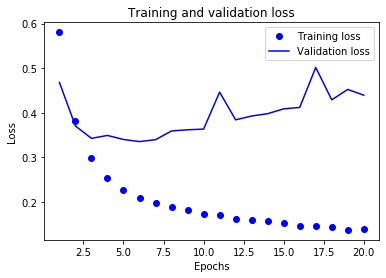

In [61]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
#Adding dropout layer

In [54]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [55]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 106ms/step - loss: 0.6435 - accuracy: 0.6131 - val_loss: 0.5426 - val_accuracy: 0.8503
Epoch 2/20
30/30 [==============================] - 2s 57ms/step - loss: 0.5363 - accuracy: 0.7513 - val_loss: 0.4304 - val_accuracy: 0.8657
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.4496 - accuracy: 0.8165 - val_loss: 0.3700 - val_accuracy: 0.8721
Epoch 4/20
30/30 [==============================] - 2s 52ms/step - loss: 0.3824 - accuracy: 0.8570 - val_loss: 0.3231 - val_accuracy: 0.8775
Epoch 5/20
30/30 [==============================] - 2s 55ms/step - loss: 0.3274 - accuracy: 0.8837 - val_loss: 0.2886 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2879 - accuracy: 0.9040 - val_loss: 0.3005 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2566 - accuracy: 0.9171 - val_loss: 0.2793 - val_accuracy: 0.8877
Epoch 8/20
3

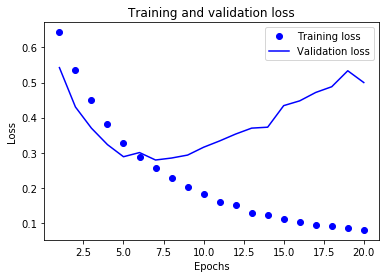

In [57]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Four techniques to fight overfitting
#Get more training data. 
#Reduce the capacity of the network. 
#Add weight regularization. 
#Add dropout.
